Dataset:- https://www.kaggle.com/datasets/mirichoi0218/insurance

Import libraries

In [19]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
sns.set()

Import the data

In [20]:
data = pd.read_csv(r"insurance.csv")

In [21]:
data.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [22]:
Y = data.iloc[:,-1]

X = data.iloc[:,:-1]
# X = data.drop(['sex','children','region','charges'],axis=1)

In [23]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
age,1338.0,39.207025,14.049960,18.0000,27.00000,39.000,51.000000,64.00000
bmi,1338.0,30.663397,6.098187,15.9600,26.29625,30.400,34.693750,53.13000
children,1338.0,1.094918,1.205493,0.0000,0.00000,1.000,2.000000,5.00000
charges,1338.0,13270.422265,12110.011237,1121.8739,4740.28715,9382.033,16639.912515,63770.42801


In [24]:
# X['bmi'] = np.where(X["bmi"].values>25,1,0)

In [25]:
data["region"].unique()

array(['southwest', 'southeast', 'northwest', 'northeast'], dtype=object)

In [26]:
# np.where((X.dtypes == object))
# X = X.drop(['sex','children','region'],axis=1)

In [27]:
# data['sex'] =np.where(data["sex"].values=="male",1,0)

In [28]:
# arr = []
# for values in data["region"]:
#     if values == "southwest":
#         arr.append(0)
#     elif values =="southeast":
#         arr.append(1)
#     elif values =="northwest":
#         arr.append(2)
#     else:
#         arr.append(3)

# data["region"] = arr

In [29]:
# data

In [30]:
# X["smoker"] = np.where(X["smoker"].values == "yes",1,2)

In [31]:
# X.corr()

In [32]:
# temp_data = X
# temp_data["children"] = data["children"]
# temp_data["region"] = data["region"]
# temp_data["sex"] = data["sex"]
# temp_data["charges"] = Y
# sns.heatmap(temp_data.corr())


In [33]:
# sns.FacetGrid(data=data, row='smoker', col='bmi').map(sns.distplot,'charges')
# plt.show()

ValueError: Image size of 164400x600 pixels is too large. It must be less than 2^16 in each direction.

Error in callback <function _draw_all_if_interactive at 0x0000028D3A0AB380> (for post_execute):


ValueError: Image size of 164400x600 pixels is too large. It must be less than 2^16 in each direction.

ValueError: Image size of 164400x600 pixels is too large. It must be less than 2^16 in each direction.

<Figure size 164400x600 with 1096 Axes>

AttributeError: 'PairGrid' object has no attribute 'T'

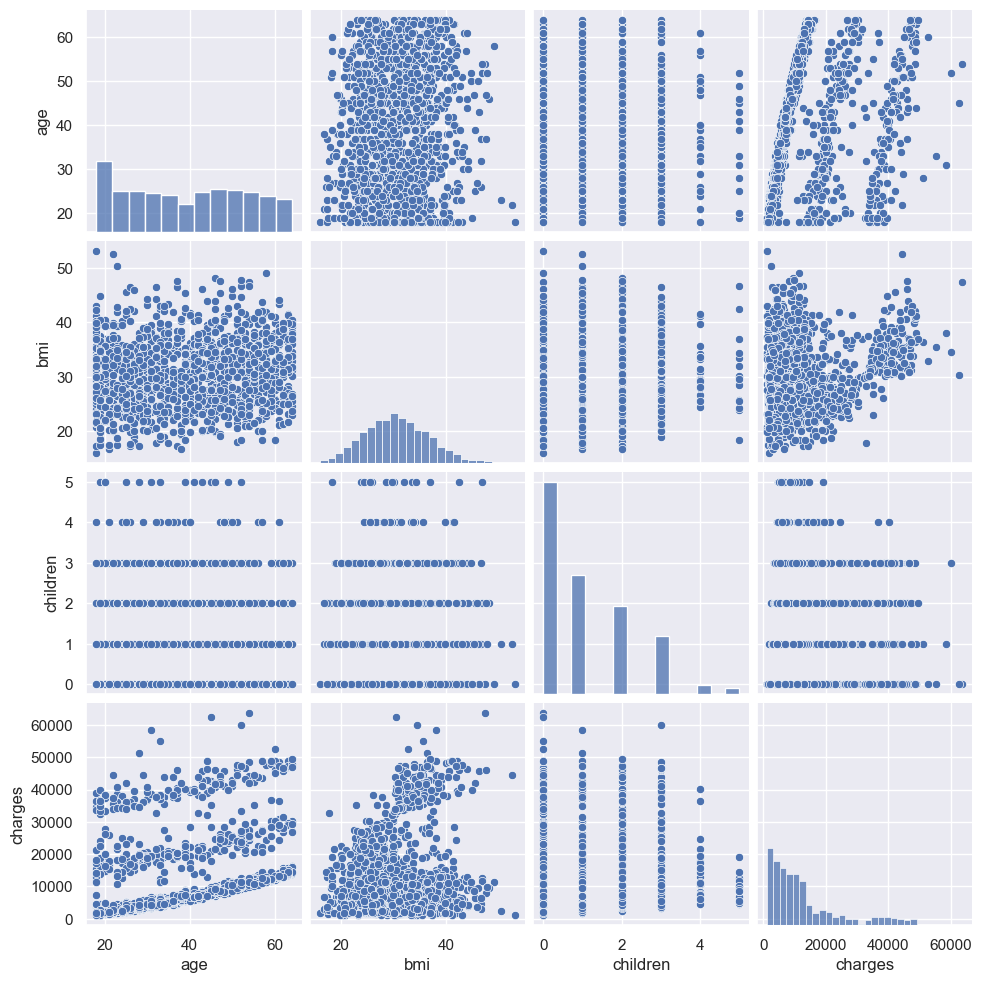

In [ ]:
sns.pairplot(data=data)

One hot label encoding method


In [34]:
def OneHotEncoderMethod(indices, data):
    from sklearn.compose import ColumnTransformer
    from sklearn.preprocessing import OneHotEncoder
    columnTransformer = ColumnTransformer([('encoder', OneHotEncoder(),indices )], remainder='passthrough')
    return columnTransformer.fit_transform(data)

Label ENCODING METHOD

In [35]:
def LabelEncoderMethod(series):
    from sklearn import preprocessing
    LE = preprocessing.LabelEncoder()
    return LE.fit_transform(series)

Encoding x features

In [36]:
def EncodingSelection(X, threshold=10):
    # Step 01 : Select the string col
    string_cols = list(np.where((X.dtypes == object))[0])
    one_hot_encoding_indices = []
    
    # Step 02: The number of categoty is 2 and more than threshold, label encode
    for col in string_cols:
        length = len(pd.unique(X[X.columns[col]]))
        if length == 2 or length > threshold:
            X[X.columns[col]] = LabelEncoderMethod(X[X.columns[col]])
        else:
            one_hot_encoding_indices.append(col)
            
    # Step 03: One hot encode otherwise 
    X = OneHotEncoderMethod(one_hot_encoding_indices, X)
    return X

In [37]:
X = EncodingSelection(X)

In [38]:
X[0]

array([ 0. ,  0. ,  0. ,  1. , 19. ,  0. , 27.9,  0. ,  1. ])

# Min Max scaler

In [39]:
from sklearn import preprocessing

sx = preprocessing.MinMaxScaler()
sy = preprocessing.MinMaxScaler()

scaled_x = sx.fit_transform(X)
scaled_y = sy.fit_transform(Y.values.reshape(data.shape[0],1))

In [ ]:
# scaled_x = np.append(scaled_x, X[:,:1],axis=1)

In [ ]:
scaled_x.shape

(1338, 9)

Train test split

In [ ]:
# from sklearn.model_selection import train_test_split
# x_train, x_test,y_train,y_test = train_test_split(scaled_x,scaled_y, test_size=0.20, random_state=1)

In [40]:
from sklearn.metrics import r2_score

# Optimizers

# SGD

In [41]:
import tensorflow as tf
import numpy as np

In [42]:
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import SGD, Adadelta, Adam, Adagrad, Adamax, Nadam, RMSprop 
from tensorflow.keras.losses import mse

Printing behins here: ----------------
Epoch 1/1000
28/28 [==============================] - 1s 2ms/step - loss: 0.0312
Epoch 2/1000
28/28 [==============================] - 0s 3ms/step - loss: 0.0255
Epoch 3/1000
28/28 [==============================] - 0s 2ms/step - loss: 0.0231
Epoch 4/1000
28/28 [==============================] - 0s 3ms/step - loss: 0.0212
Epoch 5/1000
28/28 [==============================] - 0s 3ms/step - loss: 0.0194
Epoch 6/1000
28/28 [==============================] - 0s 5ms/step - loss: 0.0180
Epoch 7/1000
28/28 [==============================] - 0s 3ms/step - loss: 0.0168
Epoch 8/1000
28/28 [==============================] - 0s 4ms/step - loss: 0.0158
Epoch 9/1000
28/28 [==============================] - 0s 3ms/step - loss: 0.0149
Epoch 10/1000
28/28 [==============================] - 0s 2ms/step - loss: 0.0142
Epoch 11/1000
28/28 [==============================] - 0s 3ms/step - loss: 0.0137
Epoch 12/1000
28/28 [==============================] - 0s 2ms/step -

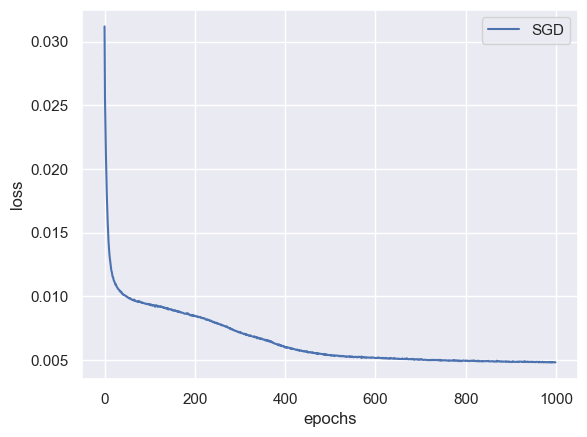

In [ ]:
# #SGD
# # Use the required optimizer to compile the model
# # The number of hidden neurons should be between the size of the input layer and the size of the output layer.
# # The number of hidden neurons should be 2/3 the size of the input layer, plus the size of the output layer.
# # The number of hidden neurons should be less than twice the size of the input layer.
# # (2/3*9 + 1 = 7)
# model = Sequential()
# model.add(Dense(9,activation = 'tanh'))
# model.add(Dense(7,activation = 'PReLU'))
# model.add(Dense(1,activation = 'tanh'))
# # model.add(Dense(1))

# print("Printing behins here: ----------------")
# model.compile(optimizer=tf.keras.optimizers.SGD(learning_rate=0.05,momentum=0.0,
#     nesterov=False,),loss=tf.keras.losses.mse)
# train = model.fit(x_train,y_train,epochs=1000)

# #loss over time
# plt.plot(train.history['loss'], label='loss')
# plt.xlabel('epochs')
# plt.ylabel('loss')
# plt.legend(['SGD'])
# # model.predict(x_test,y_test)

In [ ]:
# pred = model.predict(x_test)


14/14 [==============================] - 0s 1ms/step


In [ ]:
# r2_score(y_test,pred) # for all features

-0.35328615947889386

In [ ]:
# #turn bmi in 0 and 1 form
# r2_score(y_test,pred)

0.7355777356168881

In [ ]:
# r2_score(y_test,pred) # for age bmi smoker

0.6038662866807989

In [ ]:
# #for smoker only
# r2_score(y_test,pred)

0.09845325415433615

In [ ]:
# r2_score(y_test,pred)

0.7617013967120648

In [ ]:

# # model.add(Dense(1,activation = 'linear'))
# # model.add(Dense(1,activation = 'tanh'))
# # model.add(Dense(1,activation = 'linear'))
# r2_score(y_test,pred)

0.7812609035617907

In [ ]:
# r2_score(y_test,pred)
# # for tanh activation function 3 layers and 1000 epoch cycles SGD optimizer

0.8050631678425869

In [ ]:
# # model.add(Dense(1,activation = 'PReLU'))
# # model.add(Dense(1,activation = 'tanh'))
# # model.add(Dense(1,activation = 'tanh'))
# r2_score(y_test,pred)

0.8093953848499233

In [ ]:
# r2_score(y_test,pred)
# # model.add(Dense(1,activation = 'PReLU'))
# # model.add(Dense(1,activation = 'PReLU'))
# # model.add(Dense(1,activation = 'tanh'))

0.814654125859157

In [ ]:
# r2_score(y_test,pred)

0.8547233570472401

In [ ]:
# r2_score(y_test,pred)

0.8496066493387077

# KFOLD validation

In [ ]:
from sklearn.model_selection import KFold
kf  = KFold(n_splits=3, shuffle = True, random_state= 42)

## SGD function 

In [43]:
def SGD_model(x_train, y_train, x_test, y_test):
    model = Sequential()
    # model.add(Dense(1, activation='linear'))
    model.add(Dense(9,activation = 'tanh'))
    model.add(Dense(7,activation = 'PReLU'))
    model.add(Dense(1,activation = 'tanh'))
    # model.add(Ac)
    print("Printing behins here: ----------------")
    model.compile(optimizer=tf.keras.optimizers.SGD(learning_rate=0.05,momentum=0.0,
        nesterov=False),loss=tf.keras.losses.mse)
    train = model.fit(x_train,y_train,epochs=100)

    #loss over time
    plt.plot(train.history['loss'] ,label='loss')
    plt.title('SGD')
    plt.xlabel('epochs')
    plt.ylabel('loss')
    plt.legend('12345')
    pred = model.predict(x_test)
    return r2_score(y_test,pred)

## Mini batch SGD

In [44]:
def MINI_BATCH_SGD_model(x_train, y_train, x_test, y_test):
    model = Sequential()
    model.add(Dense(9,activation = 'tanh'))
    model.add(Dense(7,activation = 'PReLU'))
    model.add(Dense(1,activation = 'tanh'))
    # model.add(Ac)
    print("Printing behins here: ----------------")
    model.compile(optimizer=tf.keras.optimizers.SGD(learning_rate=0.05,momentum=0.0,
        nesterov=False),loss=tf.keras.losses.mse)
    train = model.fit(x_train,y_train,epochs=100, batch_size=20)

    #loss over time
    plt.plot(train.history['loss'] ,label='loss')
    plt.title('SGD')
    plt.xlabel('epochs')
    plt.ylabel('loss')
    plt.legend('12345')
    pred = model.predict(x_test)
    return r2_score(y_test,pred)

## Momentum

In [45]:
def MOMENTUM_model(x_train, y_train, x_test, y_test):
    model = Sequential()
    model.add(Dense(9,activation = 'tanh'))
    model.add(Dense(7,activation = 'PReLU'))
    model.add(Dense(1,activation = 'tanh'))
    # model.add(Ac)
    print("Printing behins here: ----------------")
    model.compile(optimizer=tf.keras.optimizers.SGD(learning_rate=0.05,momentum=0.9,
        nesterov=False),loss=tf.keras.losses.mse)
    train = model.fit(x_train,y_train,epochs=100)

    #loss over time
    plt.plot(train.history['loss'] ,label='loss')
    plt.title('SGD')
    plt.xlabel('epochs')
    plt.ylabel('loss')
    plt.ylim()
    plt.legend('12345')
    pred = model.predict(x_test)
    return r2_score(y_test,pred)

## Nesterov

In [46]:
def NESTEROV_model(x_train, y_train, x_test, y_test):
    model = Sequential()
    model.add(Dense(9,activation = 'tanh'))
    model.add(Dense(7,activation = 'PReLU'))
    model.add(Dense(1,activation = 'tanh'))
    # model.add(Ac)
    print("Printing behins here: ----------------")
    model.compile(optimizer=tf.keras.optimizers.SGD(learning_rate=0.05,momentum=0.9,
        nesterov=True),loss=tf.keras.losses.mse)
    train = model.fit(x_train,y_train,epochs=100)

    #loss over time
    plt.plot(train.history['loss'] ,label='loss')
    plt.title('SGD')
    plt.xlabel('epochs')
    plt.ylabel('loss')
    plt.legend('12345')
    pred = model.predict(x_test)
    return r2_score(y_test,pred)

## RmsProp

In [47]:
def RMSPROP_model(x_train, y_train, x_test, y_test):
    model = Sequential()
    model.add(Dense(9,activation = 'tanh'))
    model.add(Dense(7,activation = 'PReLU'))
    model.add(Dense(1,activation = 'tanh'))
    # model.add(Ac)
    print("Printing behins here: ----------------")
    model.compile(optimizer=keras.optimizers.RMSprop(learning_rate=0.05, rho=0.9, epsilon=1e-8) ,loss=tf.keras.losses.mse)
    train = model.fit(x_train,y_train,epochs=100)

    #loss over time
    plt.plot(train.history['loss'] ,label='loss')
    plt.title('SGD')
    plt.xlabel('epochs')
    plt.ylabel('loss')
    plt.legend(['1','2','3','4','5'])
    pred = model.predict(x_test)
    return r2_score(y_test,pred)

## ADAM

In [68]:
def ADAM_model(x_train, y_train, x_test, y_test):
    #Creating Sequential Model
    # lr_schedule = keras.optimizers.schedules.l
    print("Printing behins here: ----------------")
    model = Sequential()
    # model.add(Dense(1))
    model.add(Dense(9,activation = 'tanh'))
    model.add(Dense(7,activation = 'PReLU'))
    model.add(Dense(1,activation = 'tanh'))
    # Use the required optimizer to compile the model
    model.compile(optimizer=Adam(learning_rate=0.05,
        beta_1=0.9,
        beta_2=0.999,
        epsilon=1e-8,
        amsgrad=False,),loss=mse)
    train = model.fit(x_train,y_train,epochs=100)

    #loss over time
    plt.plot(train.history['loss'],label='loss')
    
    plt.xlabel('epochs')
    plt.ylabel('loss')
    plt.legend('Adam')
    pred = model.predict(x_test)
    return r2_score(y_test,pred)

## Adagrad

In [49]:
def ADAGRAD_model(x_train, y_train, x_test, y_test):
    #Creating Sequential Model
    print("Printing behins here: ----------------")
    model = Sequential()
    model.add(Dense(9,activation = 'tanh'))
    model.add(Dense(7,activation = 'PReLU'))
    model.add(Dense(1,activation = 'tanh'))
    # Use the required optimizer to compile the model
    model.compile(optimizer=Adagrad(
        learning_rate=0.05,
        initial_accumulator_value=0.1,
        epsilon=1e-7),loss=mse)
    train = model.fit(x_train,y_train,epochs=100)

    #loss over time
    plt.plot(train.history['loss'],label='loss')
    plt.xlabel('epochs')
    plt.ylabel('loss')
    plt.legend('Adagrad')
    pred = model.predict(x_test)
    return r2_score(y_test,pred)


## Adadelta


In [50]:
def ADADELTA_model(x_train, y_train, x_test, y_test):
    print("Printing behins here: ----------------")
    model = Sequential()
    model.add(Dense(9,activation = 'tanh'))
    model.add(Dense(7,activation = 'PReLU'))
    model.add(Dense(1,activation = 'tanh'))
    # Use the required optimizer to compile the model
    model.compile(optimizer=Adadelta(learning_rate=1,
        rho=0.95, epsilon=1e-07,),loss=mse)
    train = model.fit(x_train,y_train,epochs=100)

    #loss over time
    plt.plot(train.history['loss'],label='loss')
    plt.xlabel('epochs')
    plt.ylabel('loss')
    plt.legend('Adadelta')
    pred = model.predict(x_test)
    return r2_score(y_test,pred)

## NADAM

In [51]:
def NADAM_model(x_train, y_train, x_test, y_test):
    print("Printing behins here: ----------------")
    model = Sequential()
    model.add(Dense(9,activation = 'tanh'))
    model.add(Dense(7,activation = 'PReLU'))
    model.add(Dense(1,activation = 'tanh'))
    # Use the required optimizer to compile the model
    model.compile(optimizer=Nadam(learning_rate=0.05,
        beta_1=0.9,
        beta_2=0.999,
        epsilon=1e-07,),loss=mse)
    train = model.fit(x_train,y_train,epochs=100)

    #loss over time
    plt.plot(train.history['loss'],label='loss')
    
    plt.xlabel('epochs')
    plt.ylabel('loss')
    pred = model.predict(x_test)
    return r2_score(y_test,pred)


## ADAMAX

In [52]:
def ADAMAX_model(x_train, y_train, x_test, y_test):
    #Creating Sequential Model
    print("Printing behins here: ----------------")
    model = Sequential()
    model.add(Dense(9,activation = 'tanh'))
    model.add(Dense(7,activation = 'PReLU'))
    model.add(Dense(1,activation = 'tanh'))
    # Use the required optimizer to compile the model
    model.compile(optimizer=Adamax(learning_rate=0.05,
        beta_1=0.9,
        beta_2=0.999,
        epsilon=1e-07,),loss=mse)
    train = model.fit(x_train,y_train,epochs=100)

    #loss over time
    plt.plot(train.history['loss'],label='loss')
    plt.xlabel('epochs')
    plt.ylabel('loss')
    pred = model.predict(x_test)
    return r2_score(y_test,pred)

Printing behins here: ----------------
Epoch 1/50
28/28 [==============================] - 1s 1ms/step - loss: 0.0415
Epoch 2/50
28/28 [==============================] - 0s 1ms/step - loss: 0.0147
Epoch 3/50
28/28 [==============================] - 0s 2ms/step - loss: 0.0121
Epoch 4/50
28/28 [==============================] - 0s 1ms/step - loss: 0.0110
Epoch 5/50
28/28 [==============================] - 0s 2ms/step - loss: 0.0106
Epoch 6/50
28/28 [==============================] - 0s 2ms/step - loss: 0.0104
Epoch 7/50
28/28 [==============================] - 0s 2ms/step - loss: 0.0104
Epoch 8/50
28/28 [==============================] - 0s 2ms/step - loss: 0.0101
Epoch 9/50
28/28 [==============================] - 0s 2ms/step - loss: 0.0101
Epoch 10/50
28/28 [==============================] - 0s 2ms/step - loss: 0.0102
Epoch 11/50
28/28 [==============================] - 0s 2ms/step - loss: 0.0101
Epoch 12/50
28/28 [==============================] - 0s 2ms/step - loss: 0.0103
Epoch 13/5

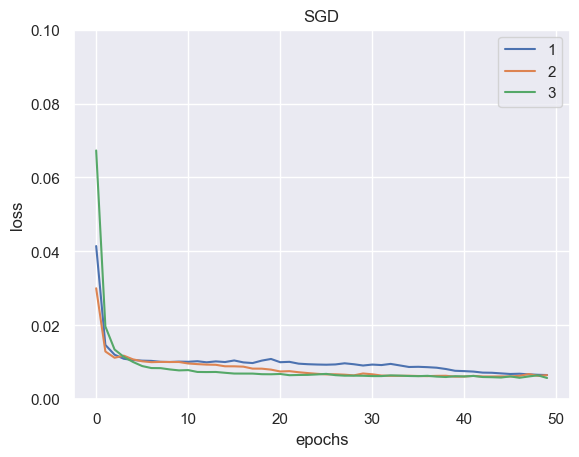

In [ ]:
SGD_score  = []
mini_batch_sgd_score= []
momentum_score = []
nesterov_score = []
rms_prop_score = []
ADAM_score = []
ADAGRAD_score = []
ADADELTA_score = []
NADAM_score = []
ADAMAX_score = []
for train_index, test_index in kf.split(scaled_x):
    x_train, x_test = scaled_x[train_index], scaled_x[test_index]
    y_train, y_test = scaled_y[train_index], scaled_y[test_index]
    # SGD_score.append(SGD_model(x_train,y_train,x_test,y_test))
    # mini_batch_sgd_score.append(MINI_BATCH_SGD_model(x_train,y_train,x_test,y_test))
    momentum_score.append(MOMENTUM_model(x_train,y_train,x_test,y_test))
    # plt.title()
    plt.ylim(0,0.1)
    plt.xlim()
    plt.legend(['1','2','3'])
    # nesterov_score.append(NESTEROV_model(x_train,y_train,x_test,y_test))
    # rms_prop_score.append(RMSPROP_model(x_train,y_train,x_test,y_test))
    # ADAM_score.append(ADAM_model(x_train,y_train,x_test,y_test))
    # ADAGRAD_score.append(ADAGRAD_model(x_train,y_train,x_test,y_test))
    # ADADELTA_score.append(ADADELTA_model(x_train,y_train,x_test,y_test))

In [54]:
from sklearn.model_selection import train_test_split
x_train, x_test,y_train,y_test = train_test_split(scaled_x,scaled_y, test_size=0.20, random_state=1)

In [67]:
SGD_score  = []
mini_batch_sgd_score= []
momentum_score = []
nesterov_score = []
rms_prop_score = []
ADAM_score = []
ADAGRAD_score = []
ADADELTA_score = []
NADAM_score = []
ADAMAX_score = []
plt.figure(figsize = (40,20))
# for train_index, test_index in kf.split(scaled_x):
# SGD_score.append(SGD_model(x_train,y_train,x_test,y_test))
# mini_batch_sgd_score.append(MINI_BATCH_SGD_model(x_train,y_train,x_test,y_test))
# momentum_score.append(MOMENTUM_model(x_train,y_train,x_test,y_test))
# # plt.title()
# nesterov_score.append(NESTEROV_model(x_train,y_train,x_test,y_test))
# rms_prop_score.append(RMSPROP_model(x_train,y_train,x_test,y_test))
ADAM_score.append(ADAM_model(x_train,y_train,x_test,y_test))
# ADAGRAD_score.append(ADAGRAD_model(x_train,y_train,x_test,y_test))
ADADELTA_score.append(ADADELTA_model(x_train,y_train,x_test,y_test))
NADAM_score.append(NADAM_model(x_train,y_train,x_test,y_test))
ADAMAX_score.append(ADAMAX_model(x_train,y_train,x_test,y_test))
plt.ylim(0,0.04)
plt.xlim(0,50)
plt.legend(['SGD', 'Mini Batch SGD', 'Momentum', 'Nesterov', 'RMSprop', 'Adam','Adagrad','Adadelta', 'Nadam','Adamax'])

Printing behins here: ----------------


TypeError: momentum is not a valid argument, kwargs should be empty  for `optimizer_experimental.Optimizer`.

<Figure size 4000x2000 with 0 Axes>

## SCORES

In [61]:
print(SGD_score,
mini_batch_sgd_score,
momentum_score,
nesterov_score,
rms_prop_score,
ADAM_score,
ADAGRAD_score,
ADADELTA_score,
NADAM_score,
ADAMAX_score )

[0.8291861310260904] [0.7579469591380797] [0.8482838358667646] [0.8542584184333116] [0.8378723042396168] [0.8310722464116787] [0.7797997019852088] [0.8288317902896203] [0.8619720075493144] [0.8522502840515934]


In [ ]:
np.mean(momentum_score)

0.8267044129602374

In [ ]:
# epoch = 500, kfold set = 3
np.mean(SGD_score)

0.7989157445445877

In [ ]:
np.mean(SGD_score)

[0.7810509903748457,
 0.7378344073707732,
 0.7679840126164018,
 0.6306667111985713,
 0.7459003067726547]

In [ ]:
np.mean(ADAM_score) 
# for 0.001 = alpha

0.6859073461332793

In [ ]:
np.mean(ADAM_score)
# for 0.01 = alpha

0.7340598802725693

In [ ]:
np.mean(ADAM_score)
# for learning rate decay

0.7379998144367365

In [ ]:
np.mean(ADAM_score)

0.8128161850683587

In [ ]:
np.mean(ADAGRAD_score)

0.820021961376966

In [ ]:
np.mean(ADADELTA_score)

0.8337911573486917

In [ ]:
np.mean(mini_batch_sgd_score)

0.7395091601511976

In [ ]:
np.mean(momentum_score) 
# without decay rate

0.7287750837320033

In [ ]:
# epoch = 500, kfold set = 3, momentum = 0.9
np.mean(momentum_score)

0.8318451244804477

In [ ]:
# epoch = 300, kfold set = 3, momentum = 0.9
np.mean(momentum_score)

0.8338039175670543

In [ ]:
np.mean(momentum_score)
# with decay rate

0.7377358670796849

In [ ]:
np.mean(nesterov_score)

0.7397622437255729

In [ ]:
np.mean(rms_prop_score)

0.7280993363428557

In [ ]:
np.mean(rms_prop_score)
# with many layers

0.795514042350899

In [ ]:
np.mean(momentum_score) # for age bmi smoker

0.7375670063487549

In [ ]:
np.mean(ADAM_score)

0.7878226643713853